In [1]:
# Import necessary libraries
import sys
import pandas as pd         
import numpy as np           
import matplotlib.pyplot as plt  
from PIL import Image
import seaborn as sns 
import random

In [2]:
# Importing the create_df function from the create_dataframe module
from functions.create_dataframe import create_df

# Creating DataFrames for the training, validation, and test sets
train_meta = create_df('train')  
valid_meta = create_df('valid')  
test_meta = create_df('test') 


In [3]:
# Displaying training dataframe
train_meta

,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,31355,1,real,train/real/31355.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,02884,1,real,train/real/02884.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,33988,1,real,train/real/33988.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,53875,1,real,train/real/53875.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,24149,1,real,train/real/24149.jpg
...,...,...,...,...,...,...
99995,49995,/kaggle/input/1-million-fake-faces/1m_faces_04...,H1JLRZ3J8U,0,fake,train/fake/H1JLRZ3J8U.jpg
99996,49996,/kaggle/input/1-million-fake-faces/1m_faces_00...,NRHSNJCH6X,0,fake,train/fake/NRHSNJCH6X.jpg
99997,49997,/kaggle/input/1-million-fake-faces/1m_faces_00...,2KN0ZS1R7V,0,fake,train/fake/2KN0ZS1R7V.jpg
99998,49998,/kaggle/input/1-million-fake-faces/1m_faces_04...,Y6UL82SD8A,0,fake,train/fake/Y6UL82SD8A.jpg


In [4]:
# Creating a list of DataFrames
df_list = [train_meta, valid_meta, test_meta]

# Looping through each DataFrame in df_list and printing the count of unique values in the 'label_str' column
for x in df_list:
    print(x['label_str'].value_counts())


label_str
real    50000
fake    50000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64


In [5]:
# Importing functions for visualization from the visualize module
from functions.visualize import plot_images, sample_images, multi_histplot

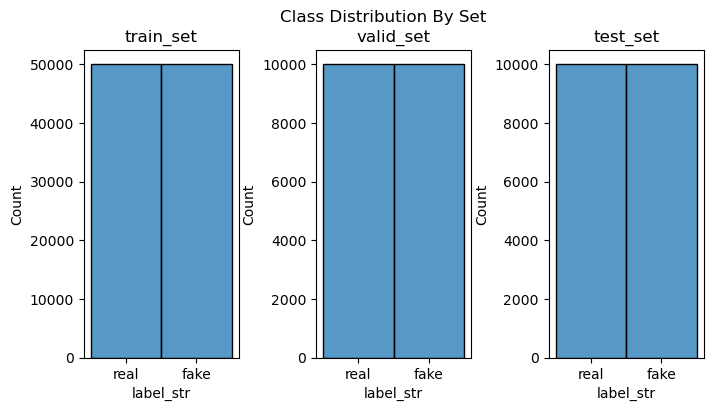

In [6]:
# Generating a multi-histogram plot for class distribution in different sets
multi_histplot(df_list[0], df_list[1], df_list[2])

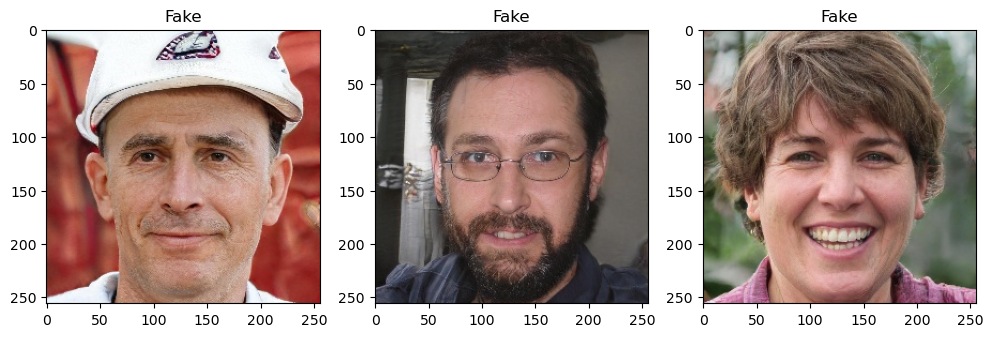

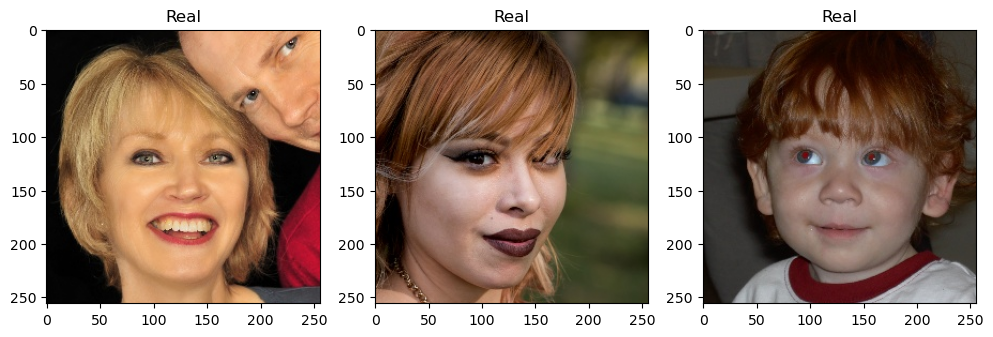

In [7]:
# Sampling fake and real images from the 'train' set
fake_images, real_images = sample_images('train', 3)

# Plotting sampled fake and real images
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

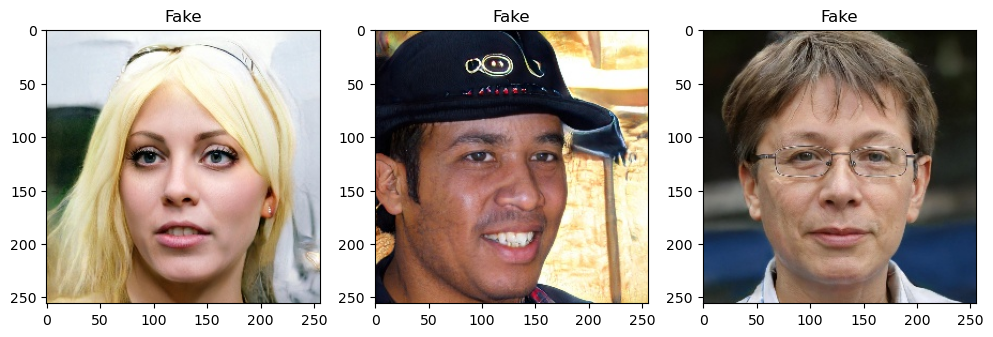

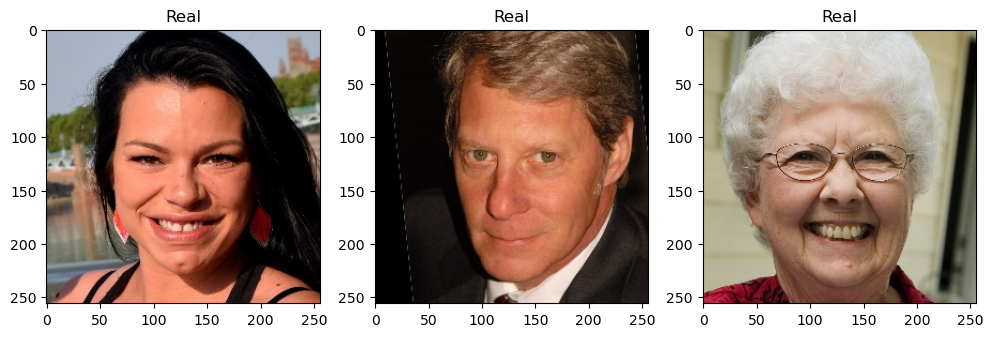

In [8]:
# Sampling fake and real images from the 'valid' set
fake_images, real_images = sample_images('valid',3)

# Plotting sampled fake and real images
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

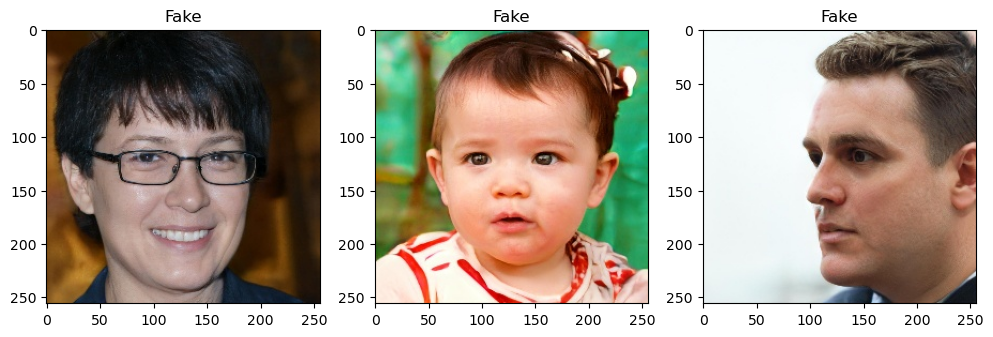

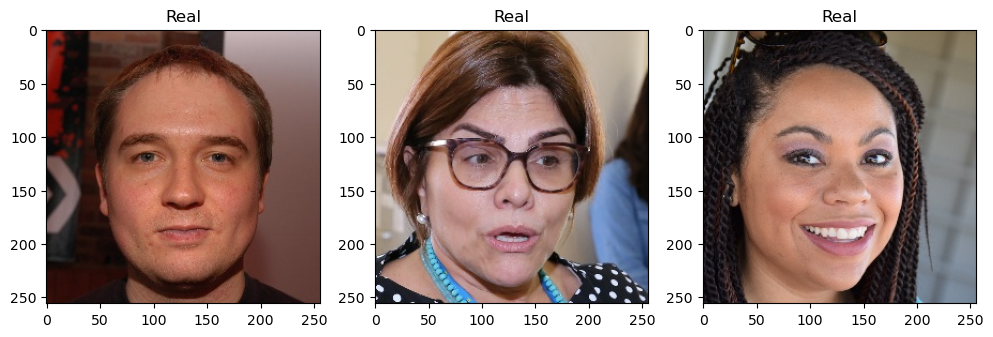

In [9]:
# Sampling fake and real images from the 'test' set
fake_images, real_images = sample_images('test',3)

# Plotting sampled fake and real images
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

In [10]:
# Importing functions for working with image paths and sizes from the 'image_size' module
from functions.image_size import path_list, image_size

# Creating lists of file paths for images in the training, validation, and test sets
train_path = path_list(train_meta)
valid_path = path_list(valid_meta)
test_path = path_list(test_meta)

In [11]:
# Extracting image dimensions (width and height) for images in the training set
train_x, train_y = zip(*image_size(train_path))

# Extracting image dimensions (width and height) for images in the validation set
valid_x, valid_y = zip(*image_size(valid_path))

# Extracting image dimensions (width and height) for images in the test set
test_x, test_y = zip(*image_size(test_path))

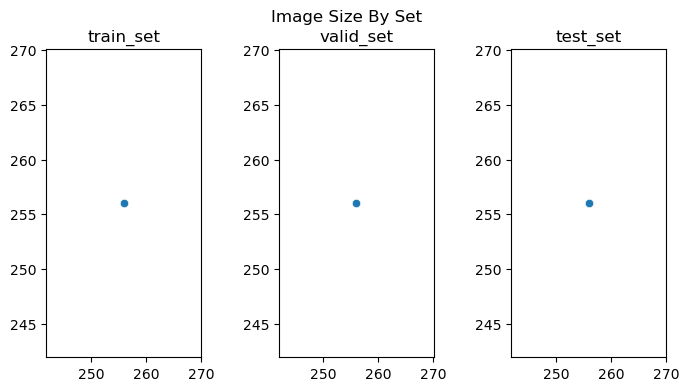

In [12]:
# Creating a 1x3 subplot grid for plotting image size by set
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# Adjusting subplot spacing and adding a title
fig.subplots_adjust(hspace=0.30, wspace=0.5)
fig.suptitle('Image Size By Set')

# List of titles for each subplot
title_list = ['train_set', 'valid_set', 'test_set']

# List of indices for each subplot
axis_list = [(0, 0), (0, 1), (0, 2)]

# Lists of x and y values for each set
x_values = [train_x, valid_x, test_x]
y_values = [train_y, valid_y, test_y]

# Iterating over sets and creating scatter plots
for x in range(3):
    sns.scatterplot(x=x_values[x], y=y_values[x], ax=axes[x]).set(title=title_list[x])

In [13]:
# Importing functions for testing RGB color information from the 'ikikcolor_test' module
from functions.color_test import color_info, color_test, length_compare

# Testing for RGB color information in the training, validation, and test sets
# Using the color_test function on the color information obtained from the color_info function
train_rgb = color_test(color_info(train_path))
valid_rgb = color_test(color_info(valid_path))
test_rgb = color_test(color_info(test_path))

In [14]:
# Creating lists of file paths and RGB color information for the training, validation, and test sets
path_list = [train_path, valid_path, test_path]
rgb_list = [train_rgb, valid_rgb, test_rgb]

# Iterating over sets and printing the length comparison between file paths and RGB information
for x in range(3):
    print(length_compare(path_list[x], rgb_list[x]))

True
True
True


In [15]:
# Opening a fake image using its file path
fake_image = Image.open(f'../real_vs_fake/real-vs-fake/{fake_images[0]}')

# Opening a real image using its file path
real_image = Image.open(f'../real_vs_fake/real-vs-fake/{real_images[0]}')

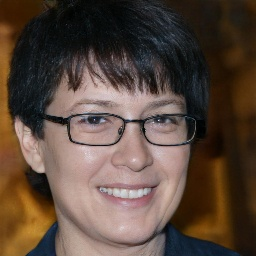

In [16]:
# Displaying image
fake_image

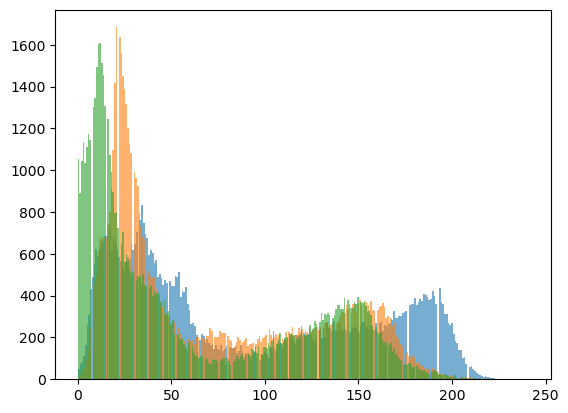

In [17]:
# Importing the color_hist function from the 'visualize' module
from functions.visualize import color_hist

# Generating a color histogram for the specified image
color_hist(fake_image)

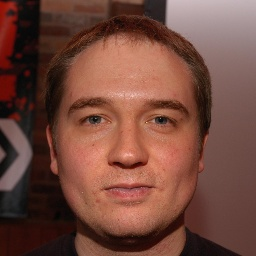

In [18]:
# Displaying image
real_image

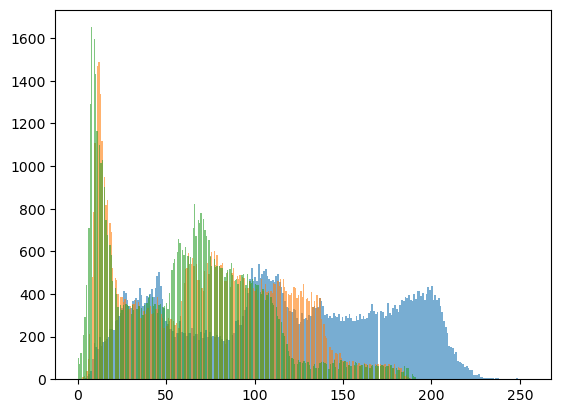

In [19]:
# Generating a color histogram for the specified image
color_hist(real_image)